Using energy density, $\varepsilon$ where $m_r(r)$ is the mass enclosed in a radius, $\rho(r)$ is the density at some radius r, and
$P(r)$ is the pressure at radius $r$.

$$
\frac{dm_r}{dr} = 4\pi r^2 \varepsilon(r)
$$

$$
\frac{dP}{dr}=
    -G\frac{m_r(r)\varepsilon(r)}{r^2}
    \left(1+\frac{P(r)}{\varepsilon(r)}\right)
    \left(1+\frac{4\pi r^3 P(r)}{m_r(r)}\right)
    \left(1-\frac{2 Gm_r(r)}{r}\right)^{-1}
$$

$r$ = radius.

$m_r(r)$ = the radius enclosed within a radius $r$.

$P(r)$ = the pressure at radius $r$.

$\varepsilon$ = energy density at radius $r$.

$G$ = gravitational constant.



I am using a polytropic equation of state, which is defined as

$$
P(\rho) = \Kappa\rho^\frac{n+1}{n} = \Kappa\rho^{1 + \frac{1}{n}}
$$

For now, I'm just going to use the EOS

$$
P(\varepsilon) = \Kappa\varepsilon^\gamma 
$$

This equation can also be expressed as 

$$
\varepsilon(P) = \left(\frac{P}{\Kappa}\right)^\frac{1}{\gamma}
$$

or 

$$
\Kappa = \frac{P}{\varepsilon^\gamma}
$$


In [ ]:
import numpy as np
from scipy.constants import G, pi
from scipy.integrate import solve_ivp

def energy_density(p):
    '''
    Calculates the energy density as a function of pressure.
    '''
    # TODO: Add valid values
    K = 1
    gamma = 2
    return (p / K) ** (1 / gamma)

def tov_rhs(r, state):
    '''
    Returns [dP/dr, dm/dr].
    '''
    # Pressure and mass
    p_r, m_r = state
    # Mass 
    dm_dr = 4*pi * r**2 * energy_density(r)
    # Pressure (split into factors)
    f1 = -G * ((m_r * energy_density(r)) / (r**2))
    f2 = 1 + (p_r / energy_density(r))
    f3 = 1 + ((4*pi * r**3 * p_r) / m_r)
    f4 = (1 - ((2*G*m_r) / r)) ** -1
    dp_dr = f1 * f2 * f3 * f4
    return [dp_dr, dm_dr]

R_0 = 1e-6
R_MAX = 10
R_SPAN = (R_0, R_MAX)
P_0 = 1e6
M_0 = 1e-6

def solve():
    intial_conditions = (P_0, M_0)
    return solve_ivp(
        tov_rhs,
        R_SPAN,
        intial_conditions
    )
    
solutions = solve()
r_solutions = solutions.t
p_solutions = solutions.y[0]
m_solutions = solutions.y[1]

print(f"Radius solutions: {r_solutions}")
print(f"Pressure solutions: {p_solutions}")
print(f"Mass Solutions: {m_solutions}")

Radius solutions: [1.00000000e-06 6.46271551e-03 7.10798706e-02 7.17251422e-01
 7.17896693e+00 1.00000000e+01]
Pressure solutions: [1000000.          999999.94317587  999997.84194983  999784.26822878
  978844.34171477  959751.60114662]
Mass Solutions: [1.00000000e-06 1.00548037e-06 8.11929865e-05 8.31449864e-01
 8.34444939e+03 3.14159265e+04]


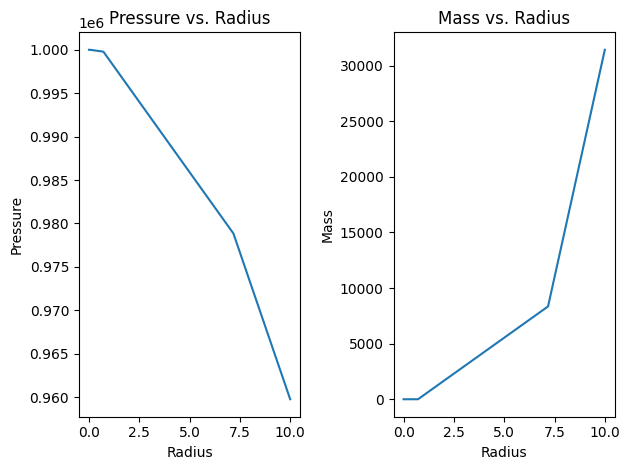

In [5]:
from matplotlib.axes import Axes
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

subplots: tuple[Figure, tuple[Axes, Axes]] = plt.subplots(1, 2)
fig, (ax1, ax2) = subplots

ax1.set_title("Pressure vs. Radius")
ax1.set_ylabel("Pressure")
ax1.set_xlabel("Radius")
ax1.plot(r_solutions, p_solutions)

ax2.set_title("Mass vs. Radius")
ax2.set_ylabel("Mass")
ax2.set_xlabel("Radius")
ax2.plot(r_solutions, m_solutions)

fig.tight_layout()
plt.show()